In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model
from scipy.stats import pearsonr
import seaborn as sns

       country  year  population           gdp    co2  co2_per_capita  \
0  Afghanistan  1991  12238879.0  1.204736e+10  1.914           0.156   
1  Afghanistan  1992  13278982.0  1.267754e+10  1.482           0.112   
2  Afghanistan  1993  14943174.0  9.834582e+09  1.487           0.100   
3  Afghanistan  1994  16250799.0  7.919857e+09  1.454           0.089   
4  Afghanistan  1995  17065836.0  1.230753e+10  1.417           0.083   

   co2_per_gdp  coal_co2  oil_co2  gas_co2  cement_co2  
0        0.159     0.250    1.204    0.389       0.046  
1        0.117     0.022    1.030    0.363       0.046  
2        0.151     0.018    1.048    0.352       0.047  
3        0.184     0.015    1.032    0.338       0.047  
4        0.115     0.015    1.011    0.322       0.047  
                    year  population       gdp       co2  co2_per_capita  \
year            1.000000    0.057750  0.089644  0.065568       -0.053663   
population      0.057750    1.000000  0.942178  0.941330       -0.0

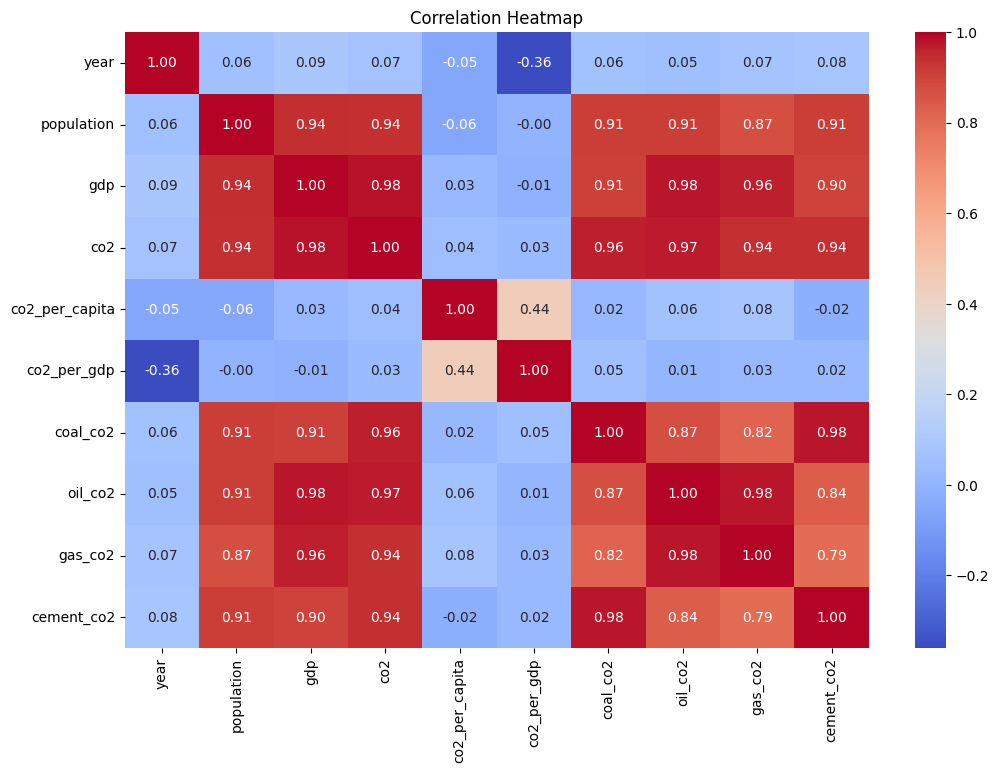

In [15]:
def clean_data(df):
    # Drop rows with any missing values
    df_cleaned = df.dropna()

    # Remove duplicates
    df_cleaned = df_cleaned.drop_duplicates()

    # Keep only the essential columns
    columns_to_keep = [
        'country', 'year', 'population', 'gdp', 
        'co2', 'co2_per_capita', 'co2_per_gdp',
        'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2'
    ]

    # Filter dataset
    df_cleaned = df[columns_to_keep].copy()

    # Convert 'year' to numeric and filter for 1991–2020
    df_cleaned['year'] = pd.to_numeric(df_cleaned['year'], errors='coerce')
    df_cleaned = df_cleaned[(df_cleaned['year'] > 1990) & (df_cleaned['year'] <= 2020)]
    df_cleaned = df_cleaned.dropna()

    # Reset index
    df_cleaned.reset_index(drop=True, inplace=True)

    # Optional: save cleaned data
    df_cleaned.to_csv('owid_co2_gdp_cleaned_simple.csv', index=False)

    return df_cleaned

# load data
data = pd.read_csv('owid-co2-data.csv')
cleaned_data = clean_data(data)
#Display the first few rows of the cleaned data
print(cleaned_data.head())

# Select only numeric columns
df_num = cleaned_data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = df_num.corr()

# Display as a table
print(corr)

# Prettier heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()




Argentina: correlation GDP ↔ CO2 = r = 0.97, p = 0.000


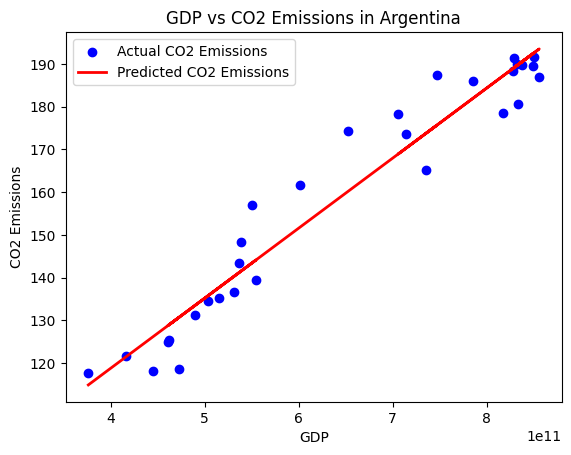

In [26]:
# already sorted by country and year
# cleaned_data = cleaned_data.sort_values(by=['country', 'year']) 

# Example: Linear regression of GDP vs CO2 emissions for a specific country
country = 'Argentina'
country_data = cleaned_data[cleaned_data['country'] == country]
X = country_data[['gdp']].values
y = country_data['co2'].values
model = linear_model.LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
# Pearson correlation
r, p = pearsonr(X.flatten(), y)
print(f"{country}: correlation GDP ↔ CO2 = r = {r:.2f}, p = {p:.3f}")

plt.scatter(X, y, color='blue', label='Actual CO2 Emissions')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted CO2 Emissions')
plt.xlabel('GDP')
plt.ylabel('CO2 Emissions')
plt.title(f'GDP vs CO2 Emissions in {country}')
plt.legend()
plt.show()


United States: correlation GDP ↔ CO2 = r = -0.09, p = 0.625
China: correlation GDP ↔ CO2 = r = 0.95, p = 0.000
India: correlation GDP ↔ CO2 = r = 1.00, p = 0.000
Germany: correlation GDP ↔ CO2 = r = -0.93, p = 0.000
Brazil: correlation GDP ↔ CO2 = r = 0.97, p = 0.000


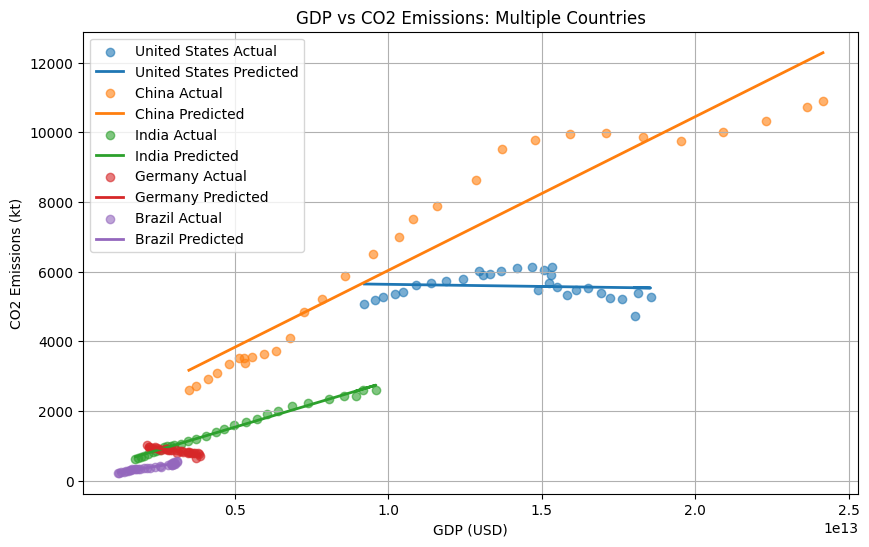

In [ ]:

countries = ['United States','China','India','Germany','Brazil']

plt.figure(figsize=(10,6))

for country in countries:
    country_data = cleaned_data[cleaned_data['country'] == country]
    
    if country_data.empty:
        print(f"No data for {country}, skipping...")
        continue
    
    X = country_data[['gdp']].values
    y = country_data['co2'].values
    
    # Linear regression
    model = linear_model.LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Pearson correlation
    r, p = pearsonr(X.flatten(), y)
    print(f"{country}: correlation GDP ↔ CO2 = r = {r:.2f}, p = {p:.3f}")
    
    # Scatter plot of actual vs predicted
    plt.scatter(X, y, alpha=0.6, label=f'{country} Actual')
    plt.plot(X, y_pred, linewidth=2, label=f'{country} Predicted')

plt.xlabel('GDP (USD)')
plt.ylabel('CO2 Emissions (kt)')
plt.title('GDP vs CO2 Emissions: Multiple Countries')
plt.legend()
plt.grid(True)
plt.show()